In [55]:
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data', header=None)
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class label']

X = df[['Petal length', 'Petal width']].values
y = pd.factorize(df['Class label'])[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [56]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [57]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=10, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=10)

In [58]:
from sklearn.metrics import accuracy_score

y_pred = ppn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.90


In [59]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

    if test_idx:

        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],X_test[:, 1],c='',alpha=1.0,linewidths=1,marker='o',s=55, label='test set', edgecolors='k')

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = X[50:150]
y = np.where(y[50:150] == 2, -1, y[50:150])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [61]:
import numpy as np

class Perceptron2(object):    
    def __init__(self, eta=0.01, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0.0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[1:] -= update * xi
                self.w_[0] -= update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Accuracy: 0.70


<ipython-input-59-ff1254039c5d>:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],X_test[:, 1],c='',alpha=1.0,linewidths=1,marker='o',s=55, label='test set', edgecolors='k')


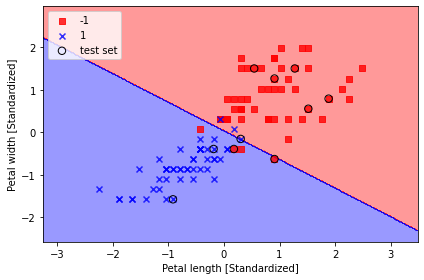

In [62]:
ppn2 = Perceptron2(eta=0.1, n_iter=20)

ppn2.fit(X_train_std, y_train)

y_pred = ppn2.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, classifier=ppn2, test_idx=range(len(y_train),len(y_train) + len(y_test)))
plt.xlabel('Petal length [Standardized]')
plt.ylabel('Petal width [Standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [63]:
class AdalineS(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

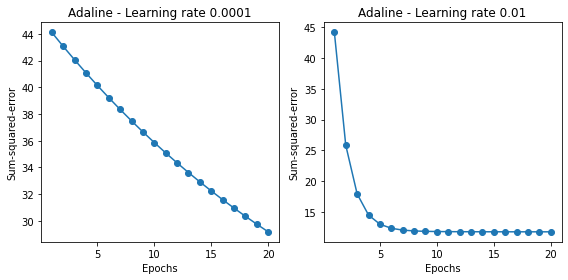

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineS(n_iter=20, eta=0.0001).fit(X_train_std, y_train)
ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline - Learning rate 0.0001')

ada2 = AdalineS(n_iter=20, eta=0.01).fit(X_train_std, y_train)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.01')

plt.tight_layout()

plt.show()

In [65]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

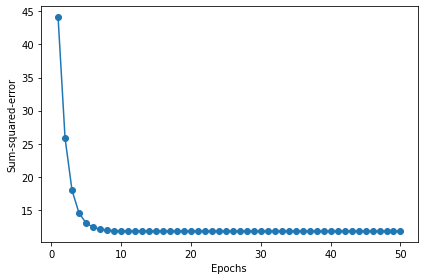

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Accuracy: 0.80


<ipython-input-59-ff1254039c5d>:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],X_test[:, 1],c='',alpha=1.0,linewidths=1,marker='o',s=55, label='test set', edgecolors='k')


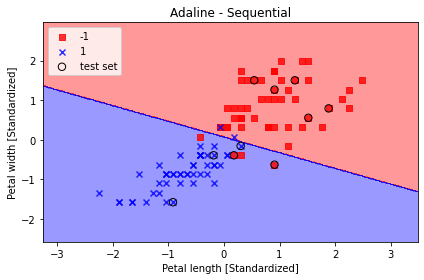

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

ada = AdalineS(n_iter=50, eta=0.01)
ada.fit(X_train_std, y_train)

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()

plt.show()

y_pred = ada.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=ada, test_idx=range(len(y_train),len(y_train) + len(y_test)))
plt.title('Adaline - Sequential')
plt.xlabel('Petal length [Standardized]')
plt.ylabel('Petal width [Standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

In [67]:
from numpy.random import seed

class AdalineB(object):
    def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.w_ = np.random.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        output = self.activation(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

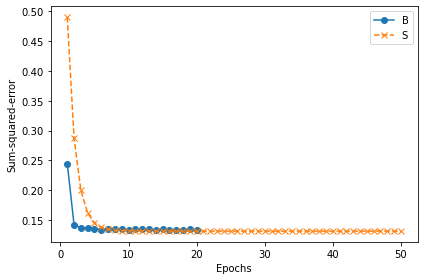

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Accuracy: 0.80


<ipython-input-59-ff1254039c5d>:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],X_test[:, 1],c='',alpha=1.0,linewidths=1,marker='o',s=55, label='test set', edgecolors='k')


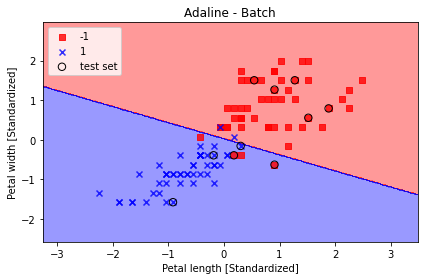

In [68]:
import matplotlib.pyplot as plt

adas = AdalineB(n_iter=20, eta=0.01, random_state=1)
adas.fit(X_train_std, y_train)

plt.plot(range(1, len(adas.cost_) + 1), adas.cost_, marker='o', label='B')
plt.plot(range(1, len(ada.cost_) + 1), np.array(ada.cost_) / len(y_train), marker='x', linestyle='--', label='S')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.legend(loc='upper right')

plt.tight_layout()

plt.show()

y_pred = adas.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=adas, test_idx=range(len(y_train),len(y_train) + len(y_test)))
plt.title('Adaline - Batch')
plt.xlabel('Petal length [Standardized]')
plt.ylabel('Petal width [Standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display

df = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data', header=None)
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class label']

X = df[['Petal length', 'Petal width']].values
y = pd.factorize(df['Class label'])[0]

X = X[50:150]
y = np.where(y[50:150] == 2, -1, y[50:150])

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

SGD_sc = StandardScaler()
SGD_sc.fit(X_train)
X_train_std = SGD_sc.transform(X_train)
X_test_std = SGD_sc.transform(X_test)

In [72]:
from numpy.random import seed

class AdalineMB(object):
    def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self, X, y, batch_size):
        self._initialize_weights(X.shape[1])
        self.M = int(X.shape[0]/batch_size)
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []

            for j in range(self.M):
                xi = X[batch_size*j : batch_size*(j+1)]
                target = y[batch_size*j : batch_size*(j+1)]
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / self.M
            self.cost_.append(avg_cost.sum())

        return self

    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.w_ = np.random.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        output = self.activation(xi)
        error = (target - output)
        self.w_[1:] += self.eta * error.T.dot(xi)
        self.w_[0] += self.eta * error.sum()
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

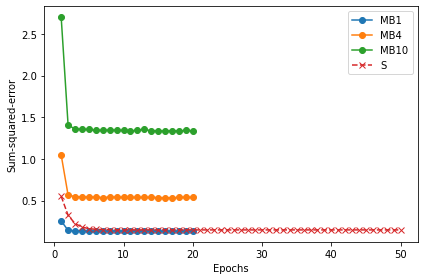

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
<ipython-input-59-ff1254039c5d>:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],X_test[:, 1],c='',alpha=1.0,linewidths=1,marker='o',s=55, label='test set', edgecolors='k')
*c* argument look

MB = 1
Accuracy: 0.85
MB = 4
Accuracy: 0.85
MB = 10
Accuracy: 0.85


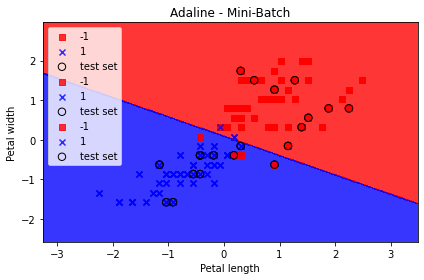

In [73]:
adas1 = AdalineMB(n_iter=20, eta=0.01, random_state=1)
adas1.fit(X_train_std, y_train, 1)

plt.plot(range(1, len(adas1.cost_) + 1), adas1.cost_, marker='o', label='MB1')

adas4 = AdalineMB(n_iter=20, eta=0.01, random_state=1)
adas4.fit(X_train_std, y_train, 4)

plt.plot(range(1, len(adas4.cost_) + 1), adas4.cost_, marker='o', label='MB4')

adas10 = AdalineMB(n_iter=20, eta=0.01, random_state=1)
adas10.fit(X_train_std, y_train, 10)

plt.plot(range(1, len(adas10.cost_) + 1), adas10.cost_, marker='o', label='MB10')

plt.plot(range(1, len(ada.cost_) + 1), np.array(ada.cost_) / len(y_train), marker='x', linestyle='--', label='S')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.legend(loc='upper right')

plt.tight_layout()

plt.show()

y_pred = adas1.predict(X_test_std)
print('MB = 1')
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

y_pred = adas4.predict(X_test_std)
print('MB = 4')
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

y_pred = adas10.predict(X_test_std)
print('MB = 10')
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=adas1, test_idx=range(len(y_train),len(y_train) + len(y_test)))
plot_decision_regions(X_combined_std, y_combined, classifier=adas4, test_idx=range(len(y_train),len(y_train) + len(y_test)))
plot_decision_regions(X_combined_std, y_combined, classifier=adas10, test_idx=range(len(y_train),len(y_train) + len(y_test)))

plt.title('Adaline - Mini-Batch')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()